In [1]:
import numpy as np
from scipy.stats import binom

N = 1000
N_pos = 113
F_H0 = binom(n=N, p=0.1)

C:\Users\Kirill\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kirill\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Kirill\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


C:\Users\Kirill\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


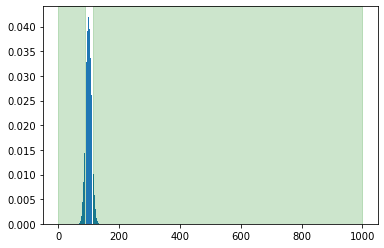

In [2]:
import matplotlib.pyplot as plt

N_pos_available = np.arange(0, 1001, 1)
probabilities = F_H0.pmf(N_pos_available)

plt.bar(N_pos_available, probabilities)
plt.axvspan(xmin=0, xmax=87, color='green', alpha=0.2)
plt.axvspan(xmin=113, xmax=N, color='green', alpha=0.2)
plt.show()

In [3]:
F_H0.cdf(87) * 2

0.18385832421122036

In [4]:
from scipy.stats import binom_test

binom_test(x=113, n=1000, p=0.1, alternative='two-sided')

0.1705138422368937

In [5]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(count=113, nobs=1000, alpha=0.05, method='normal')

(0.09337773562870501, 0.132622264371295)

In [6]:
from scipy.stats import t

mu0 = 16.5
N = 100

mu = 18.1
std = 8.2
t_n = (mu - mu0) / (std / np.sqrt(N))

2 * (1 - t(N - 1).cdf(np.abs(t_n)))

0.05385741608695005

In [7]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [10]:
import pandas as pd

new_df = pd.concat([df, target], axis=1)
age_le_30 = new_df[new_df.HouseAge <= 30]
age_g_30 = new_df[new_df.HouseAge > 30]

In [11]:
from scipy.stats import ttest_ind

ttest_ind(
    age_le_30.MedInc,
    age_g_30.MedInc,
    equal_var = False,
    alternative='two-sided'
)

Ttest_indResult(statistic=12.832590060636896, pvalue=1.5106543204708846e-37)

<AxesSubplot:xlabel='MedInc', ylabel='Count'>

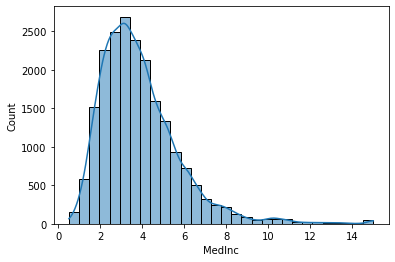

In [12]:
import seaborn as sns

sns.histplot(df.MedInc, bins=30, kde=True)

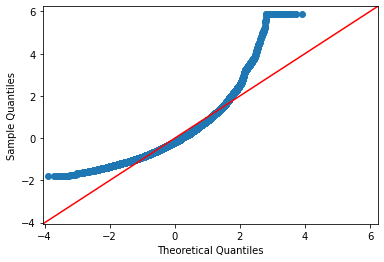

In [13]:
import statsmodels.api as sm

values = (df.MedInc - df.MedInc.mean()) / df.MedInc.std()
sm.qqplot(values, line='45')
plt.show()

In [14]:
from scipy.stats import shapiro

shapiro(df.MedInc)

C:\Users\Kirill\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8932322859764099, pvalue=0.0)

In [16]:
med_inc = np.log(df.MedInc)

<AxesSubplot:xlabel='MedInc', ylabel='Count'>

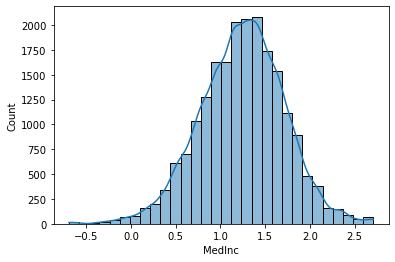

In [17]:
sns.histplot(med_inc, bins=30, kde=True)

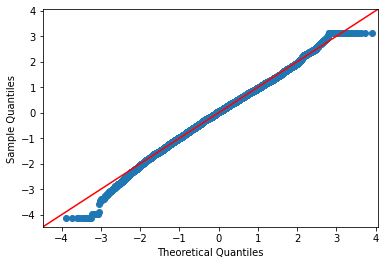

In [18]:
values = (med_inc - med_inc.mean()) / med_inc.std()
sm.qqplot(values, line='45')
plt.show()

In [19]:
shapiro(med_inc)

C:\Users\Kirill\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9971931576728821, pvalue=4.212528163327164e-19)